## Часть 1
Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или Arrow, постройте график числа сообщений в зависимости от даты. 

### Часть 2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательная визуализация. 

In [2]:
!pip install telethon
import configparser
import pandas as pd
from telethon import TelegramClient
import re
import matplotlib.pyplot as plt

     |████████████████████████████████| 528 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 8.0 MB/s  eta 0:00:01
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26362 sha256=f8b3398d391aacad47683ba5cda9b8d215f9dadb43705c114afaeb4883d3da11
  Stored in directory: /home/jovyan/.cache/pip/wheels/42/a3/7d/73d60820adb58d818179cdec3fc1be66f6f7453513a3ff0b05
Successfully built pyaes


In [3]:
api_id = 12345678
api_hash = ""
chat_id = "Sputnik_results"

client = TelegramClient(None, api_id=api_id, api_hash=api_hash)
client.connect()

messages_df = pd.DataFrame()
# Note `async with` and `async for`
async with client:
    async for msg in client.iter_messages(chat_id):
        sender_name = ""
        if (msg.sender):
            sender_name = msg.sender.first_name
        dct = {"Date": msg.date, "Name": str(sender_name or ''), "Text": msg.text}
        messages_df = messages_df.append(dct, ignore_index=True)
    
    print(messages_df)

messages_df.Date = pd.to_datetime(messages_df.Date)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: coroutine 'TelegramBaseClient.connect' was never awaited
  if __name__ == '__main__':


Please enter your phone (or bot token):  +79276354785
Please enter the code you received:  13367


Invalid code. Please try again.


Please enter the code you received:  17367


Signed in successfully as Ramil Minnigalimov
                           Date         Name  \
0     2021-12-20 19:15:01+00:00  Republisher   
1     2021-12-20 18:30:03+00:00  Republisher   
2     2021-12-20 18:13:40+00:00  Polyanskaya   
3     2021-12-20 18:00:03+00:00  Republisher   
4     2021-12-20 17:30:03+00:00  Republisher   
...                         ...          ...   
30761 2020-12-09 15:45:57+00:00       Галина   
30762 2020-12-09 15:45:53+00:00       Сергей   
30763 2020-12-09 15:45:45+00:00        Daria   
30764 2020-12-09 11:17:38+00:00    Ekaterina   
30765 2020-12-08 14:37:44+00:00                

                                                    Text  
0      🔘 **Приглашаем принять участие в КИ** 🐰\n\n1️⃣...  
1      📣 **ВЕСТНИК V1V2** выпуск #46 от 17.12.2021@15...  
2      Повторный отчет.28.11.2021 была сделана 1 доза...  
3      **Народные отчеты о вакцинации\n\n**⚠️ **ТОЛЬК...  
4      🔴 Дорогие друзья! Вы уже знаете о появлении но...  
...                     

In [15]:
# saving in csv
messages_df.to_csv('sputnik_results_msg.csv', encoding='utf-8', index=False)

In [75]:
messages_df = pd.read_csv('sputnik_results_msg.csv', encoding='utf-8')

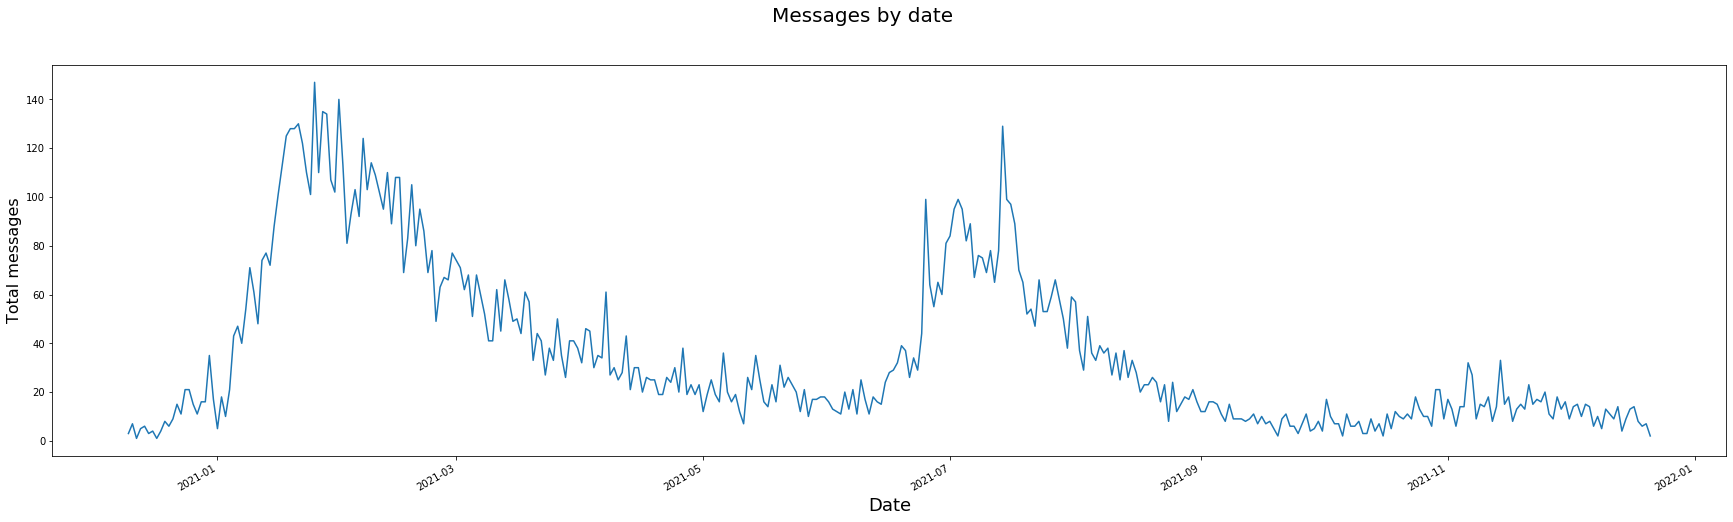

In [76]:
%matplotlib inline
fig = plt.figure(figsize=(30, 8))
fig.suptitle('Messages by date', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total messages', fontsize=16)
messages_df.Date = pd.to_datetime(messages_df.Date)
messages_df.Date.dt.round(freq='D').value_counts().plot()

In [77]:
messages_df[['Gender', 'Age']] = messages_df['Text'].str.lower().str.extract(r'^(мужчина|женщина|муж|жен|[мж])[^0-9]*(\d*)', expand=True)
messages_df = messages_df.dropna()
messages_df = messages_df[messages_df.Gender != '']
messages_df = messages_df[messages_df.Age != '']
messages_df = messages_df[messages_df.Age.astype('float') <= 100]
messages_df = messages_df.reset_index(drop=True)

In [78]:
gender_dict = {'муж': 'm', 'мужчина': 'm', 'жен': 'w', 'женщина': 'w', 'м': 'm', 'ж': 'w'}
messages_df['Gender'] = messages_df.Gender.map(gender_dict)

In [79]:
messages_df.to_csv('s_r_msg_clean.csv', encoding='utf-8', index=False)
messages_df = pd.read_csv('s_r_msg_clean.csv', encoding='utf-8')

In [80]:
# messages with parsed gender and age
print(messages_df.shape[0])

13747


In [81]:
messages_df[messages_df.Gender=='m']

,Date,Name,Text,Gender,Age
1,2021-12-20 13:59:41+00:00,Сергей,М. 50 лет. гипертония. Болел декабрь 2020. Без...,m,50
3,2021-12-20 02:47:39+00:00,Dmitriy,"М18, никаких хронических заболеваний и в целом...",m,18
6,2021-12-19 16:02:19+00:00,NikMrtzn,М29\n\nV1 16.11.2021 (Спутник V1)\nV2 07.12.20...,m,29
10,2021-12-19 10:28:26+00:00,Marina,"М 48\nВакцинация и ревакцинация, все без побоч...",m,48
13,2021-12-18 15:11:42+00:00,Юра,М 34\n24.11.21 V1 Sputnik V: Общее недомогание...,m,34
...,...,...,...,...,...
13737,2020-12-11 10:23:21+00:00,Равиль,"М, 30, первый компонент 8 декабря.\nПобочных э...",m,30
13738,2020-12-11 10:16:53+00:00,Ruslan,"Мужчина, 29 лет. Первый компонент ввели 7 дека...",m,29
13740,2020-12-11 04:02:19+00:00,Dmitry,"Мужчина, 43 года. После первой вакцинации прош...",m,43
13745,2020-12-10 05:00:09+00:00,Nikolay,М 48. Без симтомов. Тест на 30 день. вакцина 1...,m,48


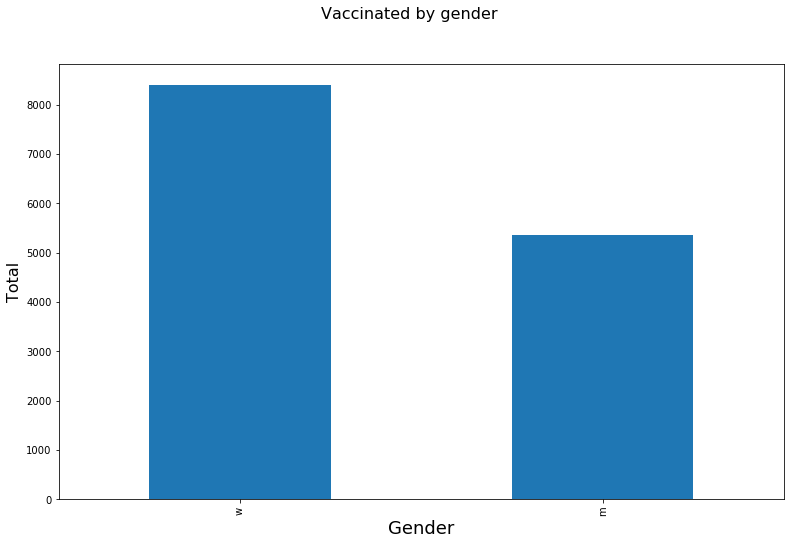

In [82]:
fig = plt.figure(figsize=(13, 8))
fig.suptitle('Vaccinated by gender', fontsize=16)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Total', fontsize=16)
messages_df['Gender'].value_counts().plot.bar()

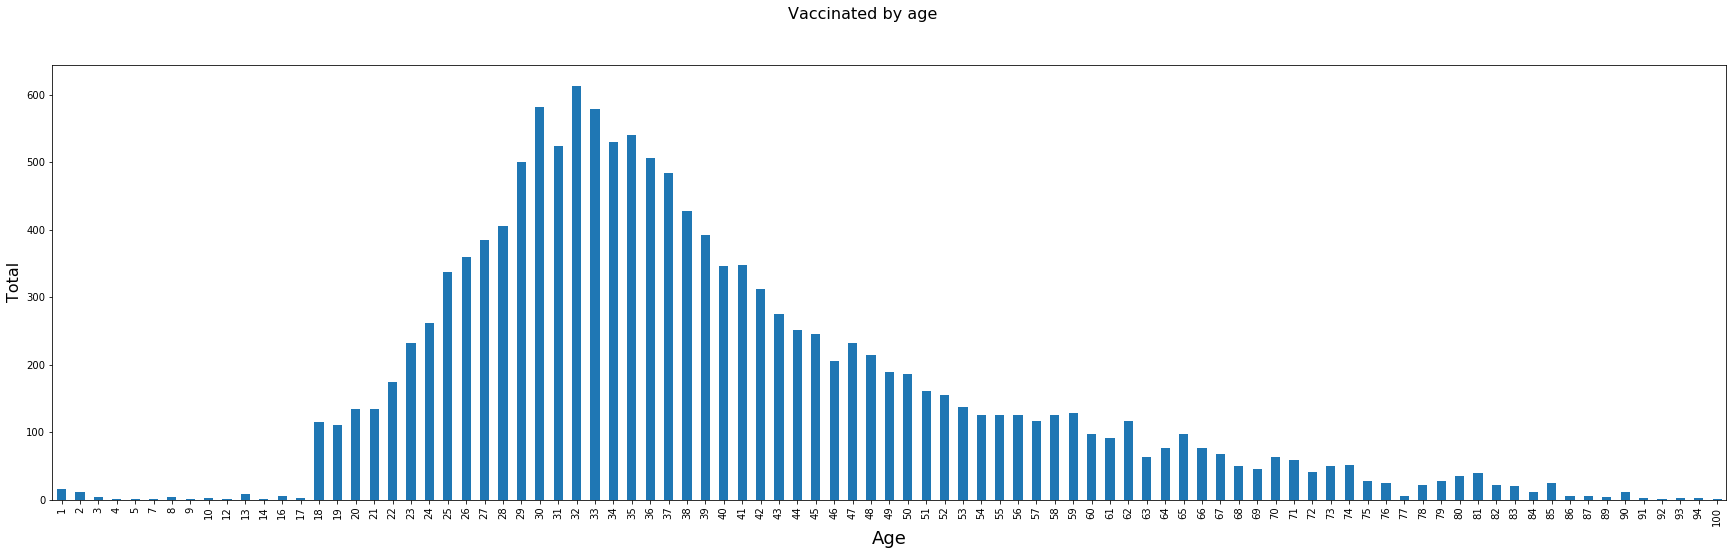

In [83]:
fig = plt.figure(figsize=(30, 8))
fig.suptitle('Vaccinated by age', fontsize=16)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Total', fontsize=16)
messages_df['Age'].value_counts().sort_index().plot.bar()

In [84]:
messages_df[['BAU']] = messages_df['Text'].str.lower().str.extract(r'(\d+(?:\.\d+)?) bau', expand=True)
messages_df = messages_df.dropna()
messages_df = messages_df[messages_df.BAU != '']
messages_df = messages_df.reset_index(drop=True)
messages_df.BAU = messages_df.BAU.astype('float')

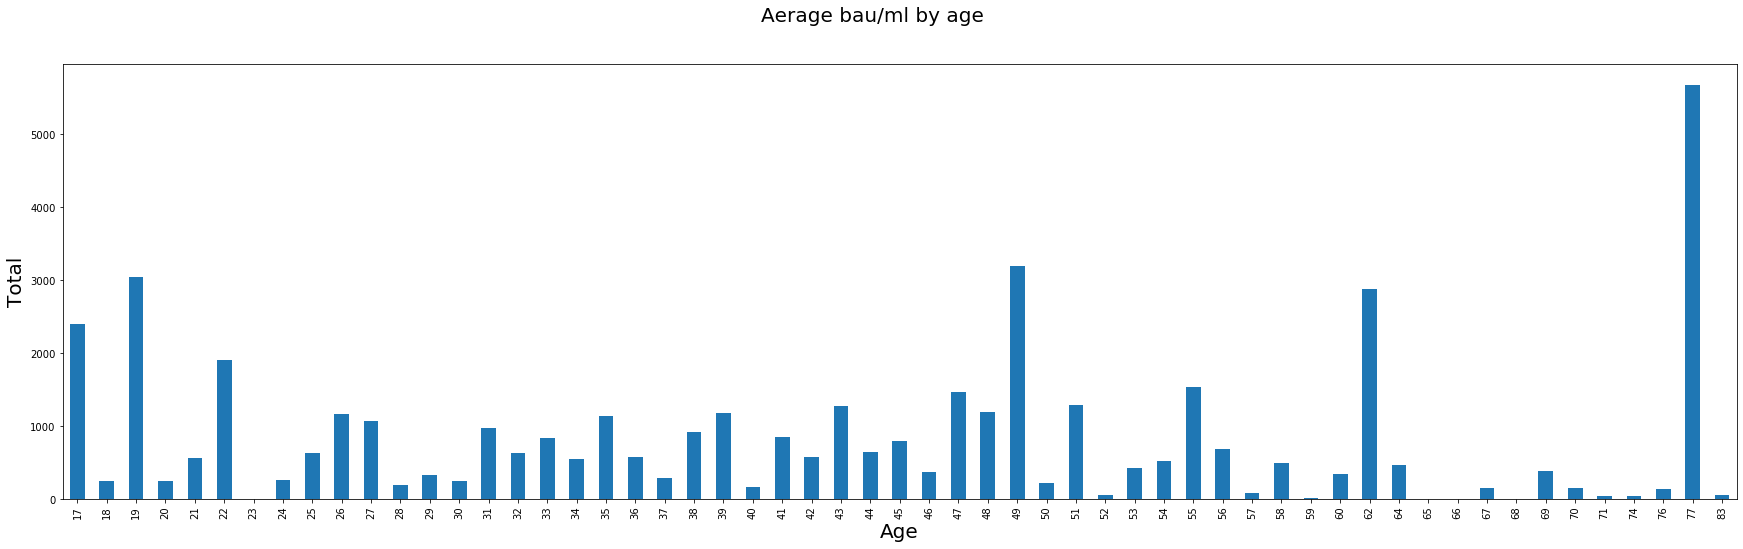

In [87]:
fig = plt.figure(figsize=(30, 8))
fig.suptitle('Aerage bau/ml by age', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Total', fontsize=20)
messages_df.groupby('Age')['BAU'].mean().plot.bar()

# Summary
По дате сообщений: можно заметить что пики активности связаны с громкими событиями как новые волны пандемии, введение каур кодов и тп.

По гендеру: стоит учитывать, что в России женщин больше чем мужчин. Однако даже так видна разница в количестве вакцинаций. Возможно это связано с социальными моделями в культуре страны.

По возрасту вакцинирование: очевидно почему нет данных с лицами младше 18. Стоит делать поправку на численность людей в каждой возрастной группе. Однако хорошо видно, как важно получение вакцины для граждан 30-40 лет.

По возрасту антитела: как мы видим ярковыраженных отличий по возрастам нет, разве что у лиц около 30-40 лет количество антител немного ниже относительно других возрастных групп. Это может быть связано с большим количеством факторов, для лучшей оценки нужно большее количество данных.